# 12 months sales data analysis

## Import necessary libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Task #1: Check the file in working directory

In [2]:
os.path.exists("Sales_Data")

True

### Task #2: Merging 12 months data into a single csv file

In [3]:
files = [file for file in os.listdir('D:/DataScienceProjects/Sales_Analysis/Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('D:/DataScienceProjects/Sales_Analysis/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    all_months_data.to_csv('Sales_Data.csv', index=False)
Sales_Data = pd.read_csv('Sales_Data.csv')
Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Question1: What was the best month for sales? how much was earned that month?

### Task #3: Clean up the data

#### Drop all NaN and 'Or' rows 

In [4]:
Sales_Data = Sales_Data.dropna(how='all')
Sales_Data = Sales_Data[Sales_Data['Order Date'].str[0:2] != 'Or']
Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Task #4: Add month Column 

In [5]:
Sales_Data['Month'] = Sales_Data['Order Date'].str[0:2]
Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [6]:
Sales_Data['Month'] = Sales_Data['Month'].astype('int32')
Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task #5: Convert 'Quantity Ordered' & 'Price Each' columns into integers & float respectively

In [7]:
Sales_Data['Quantity Ordered'] = pd.to_numeric(Sales_Data['Quantity Ordered'])
Sales_Data['Price Each'] = pd.to_numeric(Sales_Data['Price Each'])
Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task #6: Add on a Sales column

In [8]:
Sales_Data['Sales'] = Sales_Data['Quantity Ordered'] * Sales_Data['Price Each']
Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task #7: Compute the best month for sales and the amount earned

In [9]:
result_month = Sales_Data.groupby('Month').sum()
result_month

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Text(0.5, 0, 'month number')

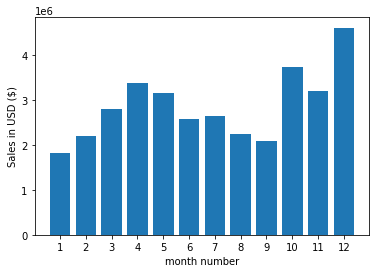

In [10]:
months = range(1,13)
plt.bar(months,result_month['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel("month number")

Answer1: The best month of sales is December with 4,613,443.34 USD

## Question 2: What city had the highest number of sales?

### Task #8: Add a City column 

In [11]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

Sales_Data['City'] = Sales_Data['Purchase Address'].apply(lambda x: get_city(x)+ ' '+get_state(x))
Sales_Data.drop(columns='Purchase Address', inplace=True)
Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,4,11.99,Los Angeles CA


### Task #9: Compute the city with the highest sales

Text(0.5, 0, 'City name')

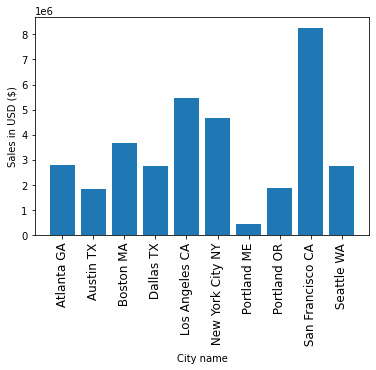

In [12]:
result_city = Sales_Data.groupby('City').sum()
cities = [city for city, df in Sales_Data.groupby('City')]
plt.bar(cities,result_city['Sales'])
plt.xticks(cities, rotation='vertical', size=12)
plt.ylabel('Sales in USD ($)')
plt.xlabel("City name")

Answer2: The city with the highest number of sales is San Francisco with 8,262,203.91 USD of sales.

## Question 3: What time should we display the advertisement to increase the likelihood that the customer will buy the product

### Task #10: Convert 'Order Date' column into date time format

In [13]:
Sales_Data['Order Date'] = pd.to_datetime(Sales_Data['Order Date'])
Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,11.99,Los Angeles CA


### Task #11: Add on 'Hour' and 'minute' columns

In [14]:
Sales_Data['Hour'] = Sales_Data['Order Date'].dt.hour
Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,11.99,Los Angeles CA,9


### Task #12: Compute the best time to display advertisement

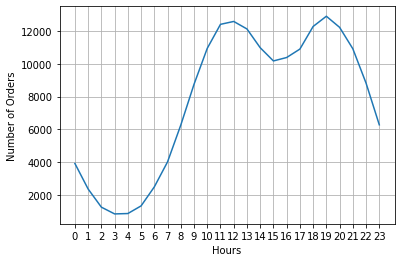

In [15]:
hours = [hour for hour, df in Sales_Data.groupby('Hour')]
result_hour = Sales_Data.groupby(['Hour']).count()['Order ID']
plt.plot(hours, result_hour)
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.xlabel("Hours")
plt.grid()
plt.show()

Answer3: The best hours to display advertisement is around 11am (11hour) and at 7pm (19hour).

## Question 4: What products are most often best sold together?

### Task #13: Compute duplicate for Order ID to see which products were sold together and adding 'Grouped Products' column

In [16]:
df = Sales_Data[Sales_Data['Order ID'].duplicated(keep=False)]
df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped Products']].drop_duplicates()

count = Counter()
for row in df['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\crispin\AppData\Local\Temp\ipykernel_9036\89776269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


## Question 5: What product sold the most? and why do you think it sold the most?

### Task #14: compute the the product sold the most 

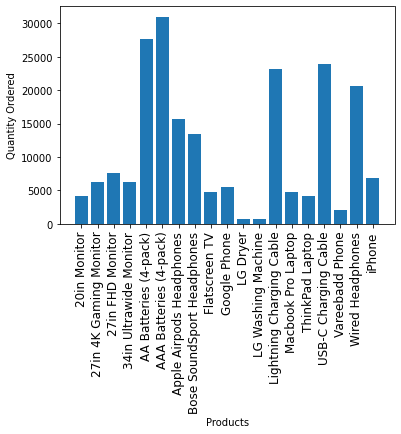

In [17]:
product_group = Sales_Data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation='vertical', size=12)
plt.show()

Answer 5a: the most sold product is AAA Batteries (4-pack)

### Task #15: Analyse the reason why it is the most sold product 

C:\Users\crispin\AppData\Local\Temp\ipykernel_9036\1185802277.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size= 12)


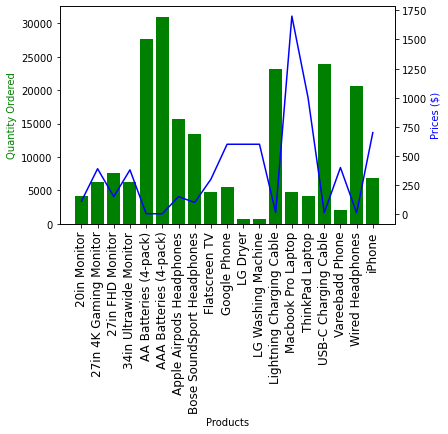

In [18]:
product_group = Sales_Data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
prices = Sales_Data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size= 12)

plt.show()

Answer 5b: The reason why the AAA Batteries are the most sold is beacause of the low price